# RFM Analysis for E-commerce Customer Segmentation

In the e-commerce industry, identifying and understanding different customer segments is essential for optimizing marketing efforts, improving customer retention, and increasing revenue.  
However, traditional segmentation methods often fall short in capturing customer behavior patterns effectively and dynamically.

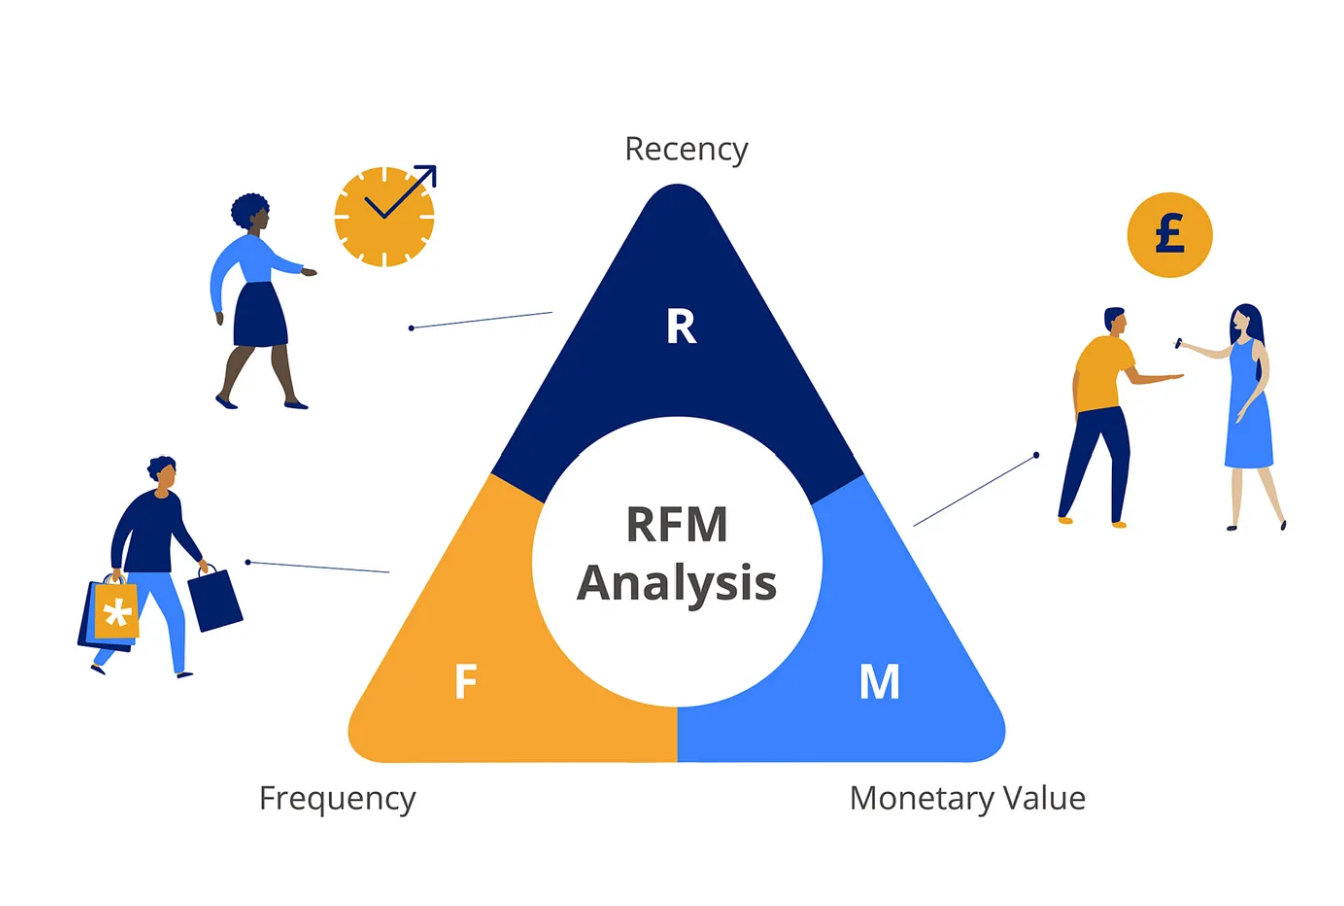

This project focuses on applying **RFM (Recency, Frequency, Monetary)** analysis — a proven marketing technique — to segment customers based on their purchasing behavior:

- **Recency (R)**: How recently a customer made a purchase.
- **Frequency (F)**: How often a customer makes purchases.
- **Monetary Value (M)**: How much money a customer spends.

The objective is to use RFM scores to:

- Categorize customers into meaningful groups such as loyal customers, big spenders, at-risk customers, and churned customers.
- Enable the business to personalize marketing campaigns for different segments.
- Identify high-value customers and strategize retention efforts accordingly.
- Predict potential churn and take proactive actions to re-engage customers.
- Maximize marketing ROI by focusing on the most profitable customer segments.

By leveraging RFM analysis combined with clustering techniques (such as K-Means Clustering or Hierarchical Clustering), we aim to automate customer segmentation in a way that is **data-driven, actionable, and scalable**.  
This will empower the business to make smarter strategic decisions and foster stronger, more profitable customer relationships.

### import Libraries as required

In [6]:
# Importing system libraries
import os   # To interact with the operating system (e.g., file paths)


# Importing numerical and data manipulation libraries
import numpy as np   # For numerical operations
import pandas as pd  # For handling dataframes and data manipulation

# Importing visualization libraries
import matplotlib.pyplot as plt   
%matplotlib inline  
import seaborn as sns  
sns.set()   

# Suppressing warnings to keep the notebook output clean
import warnings
warnings.filterwarnings('ignore')  


### Load the Data

In [8]:
#import the data
df=pd.read_csv("E-com_Data.csv")

### First five rows of the dataset

In [10]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


### Shape

In [12]:
df.shape

(541116, 12)

### Datatypes of the Variables

In [14]:
df.dtypes

CustomerID           float64
Item Code             object
InvoieNo             float64
Date of purchase      object
Quantity             float64
Time                  object
price per Unit       float64
Price                float64
Shipping Location     object
Cancelled_status      object
Reason of return      object
Sold as set          float64
dtype: object

### Count the number of non-null entries in each column

In [16]:
df.count()

CustomerID           404189
Item Code            537979
InvoieNo             537979
Date of purchase     537979
Quantity             537979
Time                 537979
price per Unit       537979
Price                537979
Shipping Location    537979
Cancelled_status       8345
Reason of return          3
Sold as set               0
dtype: int64

### Checking Unique Values

In [18]:
df.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

### Missing Value Check

In [20]:
df.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [21]:
#our main columns are Date of Purchase, Price, Invoice NUmber , we can drop unncessary columns

### Convert 'Date of purchase' column to datetime format

In [23]:
#Converting Date of Purchase into Date and time
df['Date of purchase'] =pd.to_datetime(df['Date of purchase'])
df.dtypes

CustomerID                  float64
Item Code                    object
InvoieNo                    float64
Date of purchase     datetime64[ns]
Quantity                    float64
Time                         object
price per Unit              float64
Price                       float64
Shipping Location            object
Cancelled_status             object
Reason of return             object
Sold as set                 float64
dtype: object

### Minimum (earliest) Date of Purchase in the DataSet

In [25]:
print("Min: ",df['Date of purchase'].min())

Min:  2016-12-02 00:00:00


### Maximum (latest) Date of Purchase in the 'Date of purchase'

In [27]:
print("Max: ",df['Date of purchase'].max())

Max:  2017-12-19 00:00:00


### All column names in the DataFrame

In [29]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

### Check for duplicate rows

In [31]:
df.duplicated().sum()

3145

### Drop duplicate rows

In [33]:
# Drop duplicate rows and reset the index
df = df.drop_duplicates(ignore_index=True)

# Check how many duplicate rows remain (should be 0 after dropping)
print(df.duplicated().sum())

0


### Number of rows and columns After dropping Duplicates

In [35]:
df.shape

(537971, 12)

### Keep necessary columns for analysis Date of purchase, Price, InvoiceNo ,CustomerUD

In [37]:
#Keep necessary columns Date of purchase, Price, InvoiceNo ,CustomerUD,discard other columns 
df1 = df[['CustomerID','InvoieNo','Date of purchase','Price']]
df1.head(5)

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


### Checking for duplicates

In [39]:
df1.duplicated().sum()

2863

### Rename the Date of Purchase Column

In [41]:
df1 =df1.rename(columns={'Date of purchase':'Date'})
df1.head()

,CustomerID,InvoieNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


### Checking for missing Values

In [43]:
#missing data in %ge
(df1.isnull().sum()/len(df1))*100

CustomerID    24.869370
InvoieNo       0.000186
Date           0.000186
Price          0.000186
dtype: float64

In [44]:
# provides a summary of a DataFrame, including details like data types, counts, unique values, null values, and minimum values.
def summary(df,pred=None):

    obs = df.shape
    types = df.dtypes
    counts =df.apply(lambda x: x.count())
    mins = df.min()
    uniques = df.apply(lambda x: x.unique().shape[0])
    nulls = df.apply(lambda x:x.isnull().sum())
    shape = print("Data Shape: ",df.shape)

    if pred is None:
        cols = ['Types','Counts','uniques','nulls','min']
        str = pd.concat([types,counts,uniques,nulls,mins],axis=1,sort=True)

    str.columns=cols
    dtypes = str.dtypes.value_counts()
    print("-----------------------------\nDataTypes:")
    return str

### Data Cleaning 

In [46]:
# Filter out rows where CustomerID is null
df1 = df1[~(df1.CustomerID.isnull())]

# Filter out rows where Price is less than or equal to 0
df1 = df1[~(df1.Price < 0)]

# Filter out rows where Price is greater than 0
df1 = df1[df1.Price > 0]

# Generate the summary details
details = summary(df1)

# Display the summary sorted by the 'uniques' column in descending order
display(details.sort_values(by='uniques', ascending=False))

Data Shape:  (395998, 4)
-----------------------------
DataTypes:


,Types,Counts,uniques,nulls,min
InvoieNo,float64,395998,18305,0,361429.0
Price,float64,395998,8805,0,12.0
CustomerID,float64,395998,4324,0,2.0
Date,datetime64[ns],395998,381,0,2016-12-02 00:00:00


### Min Max Date

In [48]:
print("Min Date:",df1['Date'].min())
print("-----------------------------------------\nMax Date:",df1['Date'].max())

Min Date: 2016-12-02 00:00:00
-----------------------------------------
Max Date: 2017-12-19 00:00:00


### Creating date time object

In [50]:
import datetime
new_date = datetime.datetime(2017,12,20,0,0)

In [51]:
new_date
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395998 entries, 0 to 537940
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  395998 non-null  float64       
 1   InvoieNo    395998 non-null  float64       
 2   Date        395998 non-null  datetime64[ns]
 3   Price       395998 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.1 MB


### Building RFM (Recency,Monetory,Frequency) Approach

To build an RFM (Recency, Frequency, Monetary) model, we analyze customer behavior based on their interactions with the business, and we segment them into groups based on their purchasing patterns. This approach helps businesses tailor marketing campaigns, improve customer retention, and boost sales.

The Three RFM Variables:
* **Recency (R)**: How recently a customer made a purchase. More recent customers are often more valuable.

* **Frequency (F)**: How often a customer makes a purchase. Customers who buy more often are typically more loyal.

* **Monetary (M)**: How much money a customer spends. High spenders are valuable customers

In [54]:
RFMAproach = df1.groupby('CustomerID').agg({'Date': lambda x : (new_date-x.max()).days,'InvoieNo':lambda x: x.count(),'Price':lambda x: x.sum()} )
RFMAproach.rename(columns={'Date':'Recency','Price':'Monetory','InvoieNo':'Frequency'},inplace=True)
RFMAproach.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,77,166972.0
...,...,...,...,...
4319,4368.0,278,10,20480.0
4320,4369.0,181,7,10774.0
4321,4370.0,9,12,25177.0
4322,4371.0,4,754,280608.0


In [55]:
RFMAproach.describe()

,Recency,Frequency,Monetory
count,4324.000000,4324.000000,4.324000e+03
mean,93.755319,91.581406,2.339841e+05
std,100.115549,228.617397,8.636663e+05
min,1.000000,1.000000,3.880000e+02
25%,19.000000,17.000000,3.928800e+04
50%,52.000000,41.000000,8.614700e+04
75%,143.250000,100.000000,2.108338e+05
max,381.000000,7837.000000,3.553619e+07


1. Recency (R):
Customers who have visited recently (e.g., within 1-19 days) are considered high priority because they are more likely to engage with your business and respond to marketing campaigns.

Good Customers: Customers with recency between 1-19 days are your top priority.

Medium Priority: Customers who fall in the range of 20-50% of recency (e.g., 20-52 days) are in the second priority group.

Low Priority: Customers who haven’t visited recently (e.g., above 50% of the recency range) are at risk of churn.

2. Frequency (F):
Customers who visit more frequently should also be prioritized, as frequent visits suggest that they are more engaged with your business.

Customers who visit the most (e.g., those in the top 25% of frequency) should be prioritized.

This metric indicates loyalty, so frequent visitors should receive special attention or rewards.

3. Monetary (M):
Customers who spend the most should always be prioritized for marketing, retention, and personalized offers, as they contribute significantly to your revenue.

High-spending customers (top 25% in monetary value) should be your top priority.

You can categorize these customers as "Big Spenders" and tailor exclusive offers or loyalty rewards for them.

### Calculates the quantiles (25th, 50th, and 75th percentiles) for the RFM metrics (Recency, Frequency, and Monetary)

In [58]:
quantiles = RFMAproach.quantile([0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 19.0, 0.5: 52.0, 0.75: 143.25},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetory': {0.25: 39288.0, 0.5: 86147.0, 0.75: 210833.75}}

In [59]:
# Frequency and Monetory are directly proptional , as frequeny increases , monetory also increases
#recency and frequency are inversly propotional
# REcency and Monetory are inversly propotional
#Recency is less , Frequenct is high , Monetory is high ---> good Customers

### Assign a score based on a percentage threshold and the data quantiles

**1. Recency (R) Scoring**:
Recency measures how recently a customer made a purchase. Recent customers are more likely to engage with marketing campaigns.

Objective: Assign higher scores to customers who made recent purchases.

Score Breakdown:

Score 4 (Most Recent): Customers who made a purchase within the top 25% of the recency distribution (i.e., recent customers).

Score 3: Customers who made a purchase within the 25-50% range.

Score 2: Customers who made a purchase within the 50-75% range.

Score 1 (Least Recent): Customers who made a purchase in the bottom 25% of the recency distribution (i.e., those who haven't made recent purchases).

**2. Frequency (F) Scoring**:
Frequency measures how often a customer makes a purchase. More frequent buyers are often more loyal.

Objective: Assign higher scores to customers who make frequent purchases.

Score Breakdown:

Score 4 (Most Frequent): Customers who purchase most often (top 25% of the frequency distribution).

Score 3: Customers who purchase frequently but not as much (25-50% range).

Score 2: Customers who make a few purchases (50-75% range).

Score 1 (Least Frequent): Customers who purchase least frequently (bottom 25%).

**3. Monetary (M) Scoring**:
Monetary measures how much a customer spends. High-spending customers are highly valuable.

Objective: Assign higher scores to customers who spend more money.

Score Breakdown:

Score 4 (Top Spenders): Customers who have spent in the top 25% of the monetary distribution.

Score 3: Customers who are middle spenders (25-50% range).

Score 2: Customers who spend below average (50-75% range).

Score 1 (Low Spenders): Customers who have spent the least (bottom 25%).


In [61]:
def recency_Value(x,p,d):

# x is the data point we are evaluating, which would be the Recency, Frequency, or Monetary for a specific customer.
# p is the specific metric we are using (like 'Recency', 'Frequency', or 'Monetary'). It allows the function to be flexible and reusable across different metrics.
# d is the quantile dictionary, which contains the quantiles for the RFM metrics.
                                                           
# Define the thresholds for Recency, Frequency, or Monetary based on quantiles
    if x<= d[p][0.25]:
        return 1
    elif x<= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4
        

In [62]:
def freq_mon_Value(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [63]:
RFMAproach.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [64]:
# Applying the Recency scoring function
RFMAproach['R'] = RFMAproach['Recency'].apply(recency_Value, args=('Recency', quantiles))

# Applying the Frequency scoring function
RFMAproach['F'] = RFMAproach['Frequency'].apply(freq_mon_Value, args=('Frequency', quantiles))

# Applying the Monetary scoring function
RFMAproach['M'] = RFMAproach['Monetory'].apply(freq_mon_Value, args=('Monetory', quantiles))

# Displaying the result
RFMAproach

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,3,3,1
4.0,19,72,176613.0,1,2,2
5.0,311,16,41976.0,4,4,3
6.0,37,77,166972.0,2,2,2
...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4
4369.0,181,7,10774.0,4,4,4
4370.0,9,12,25177.0,1,4,4


### Calculating the total RFM score by summing the values of R, F, and M

The final RFM Score for each customer is the sum of their individual Recency, Frequency, and Monetary scores. A higher RFM score indicates a more valuable customer.

**Total RFM Score = Recency Score + Frequency Score + Monetary Score**

In [67]:
RFMAproach['RFM'] = RFMAproach[['R','F','M']].sum(axis=1)
RFMAproach['RFM']. value_counts()
RFMAproach=RFMAproach.reset_index()
RFMAproach

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,1,2,2,5
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,77,166972.0,2,2,2,6
...,...,...,...,...,...,...,...,...
4319,4368.0,278,10,20480.0,4,4,4,12
4320,4369.0,181,7,10774.0,4,4,4,12
4321,4370.0,9,12,25177.0,1,4,4,9
4322,4371.0,4,754,280608.0,1,1,1,3


### Number of unique RFM scores 

In [69]:
RFMAproach['RFM'].nunique()

10

### Customer Segmentation:
Based on the total RFM score, customers were segmented into four loyalty levels: **Platinum, Gold, Silver, and Bronze**

qcut was used to divide the customers into 4 quantiles, which are labeled with the loyalty levels.



In [71]:
# Define the loyalty levels based on RFM score
LoyaltyLevel = ['Platinum', 'Gold', 'Silver', 'Bronze']

# Segment the customers into 4 quantiles based on their RFM scores
# `q=4` divides the data into 4 equal-sized groups (quartiles)
# `labels=LoyaltyLevel` assigns the labels 'Platinum', 'Gold', 'Silver', and 'Bronze' to these groups
score_cuts = pd.qcut(RFMAproach['RFM'], q=4, labels=LoyaltyLevel)

# Assign the calculated loyalty levels to a new column in the DataFrame
RFMAproach['LoyaltyLevel'] = score_cuts.values

# Reset the index to clean up after the operations
RFMAproach = RFMAproach.reset_index(drop=True)

# Display the updated DataFrame with loyalty levels
RFMAproach.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,LoyaltyLevel
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,1,2,2,5,Platinum
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,77,166972.0,2,2,2,6,Gold


In [72]:
score_cuts

0       Platinum
1           Gold
2       Platinum
3         Bronze
4           Gold
          ...   
4319      Bronze
4320      Bronze
4321      Silver
4322    Platinum
4323    Platinum
Name: RFM, Length: 4324, dtype: category
Categories (4, object): ['Platinum' < 'Gold' < 'Silver' < 'Bronze']

### Save the customer segmentation details to a CSV file
The DataFrame `RFMAproach` contains the customer's Recency, Frequency, Monetary scores, and their assigned loyalty levels

In [74]:
RFMAproach.to_csv('Segmentation_Customer_details.csv')

### Count of customers in each Loyalty Level (Platinum, Gold, Silver, Bronze).

In [76]:
RFMAproach['LoyaltyLevel'].value_counts()

LoyaltyLevel
Gold        1298
Platinum    1274
Silver       980
Bronze       772
Name: count, dtype: int64

### Group the data by 'LoyaltyLevel' and aggregate the relevant columns for each loyalty group

In [78]:
# Group the data by 'LoyaltyLevel' and aggregate the relevant columns for each loyalty group
final_report = RFMAproach.groupby('LoyaltyLevel')[['CustomerID', 'Recency', 'Frequency', 'Monetory']].agg({
    'CustomerID': 'nunique',  # Count the number of unique customers in each loyalty level
    'Recency': 'sum',         # Sum of Recency scores for each loyalty level
    'Frequency': 'sum',       # Sum of Frequency scores for each loyalty level
    'Monetory': 'sum'         # Sum of Monetary values for each loyalty level
}).reset_index()  # Reset index after aggregation to ensure 'LoyaltyLevel' is a column

In [79]:
final_report = final_report.rename(columns={'CustomerID':'NumBuyers'})
final_report['Percent'] =round( ((final_report['NumBuyers']/final_report.NumBuyers.sum())*100),2)

In [80]:
final_report

,LoyaltyLevel,NumBuyers,Recency,Frequency,Monetory,Percent
0,Platinum,1274,26807,289408,771518839.0,29.46
1,Gold,1298,84831,74310,168474168.0,30.02
2,Silver,980,124521,23894,52331162.1,22.66
3,Bronze,772,169239,8386,19423261.0,17.85


In [81]:
final_report1 = final_report[['LoyaltyLevel','NumBuyers','Percent']]

In [82]:
final_report1

,LoyaltyLevel,NumBuyers,Percent
0,Platinum,1274,29.46
1,Gold,1298,30.02
2,Silver,980,22.66
3,Bronze,772,17.85


### **Insights:**

1. **Platinum Customers**:
   - **1274 customers** make up **29.46%** of the customer base.
   - **Recency**: Low value (26807), suggesting frequent or recent buyers.
   - **Frequency**: High frequency of purchases (289408), indicating loyalty and frequent engagement.
   - **Monetary**: Highest spending at **771.5 million**, marking them as the highest-value customers.
   - **Strategic Focus**: These customers should be prioritized for loyalty programs and exclusive offers to retain and further increase engagement.

2. **Gold Customers**:
   - **1298 customers** make up **30.02%** of the customer base, the largest segment.
   - **Recency**: Moderate recency (84831), indicating customers who are still engaged but not as recent as Platinum.
   - **Frequency**: Moderate frequency of purchases (74310).
   - **Monetary**: Strong spending of **168.5 million**, but less than Platinum.
   - **Strategic Focus**: Engage these customers with targeted offers and loyalty incentives to increase their spending and frequency.

3. **Silver Customers**:
   - **980 customers** make up **22.66%** of the customer base.
   - **Recency**: Higher recency (124521), indicating these customers haven’t purchased recently.
   - **Frequency**: Low frequency (23894), meaning they don't purchase as often.
   - **Monetary**: Moderate spending (**52.3 million**).
   - **Strategic Focus**: Target this group with re-engagement strategies to encourage them to make more purchases and move into higher loyalty levels.

4. **Bronze Customers**:
   - **772 customers** make up **17.85%** of the customer base, the smallest group.
   - **Recency**: High recency (169239), indicating they have not purchased in a long time.
   - **Frequency**: Very low frequency (8386), and very low spending (**19.4 million**).
   - **Strategic Focus**: Focus on re-engaging this segment through discounts or special offers to increase frequency and spending, or risk losing them completely.

### **Strategic Takeaways:**

- **Platinum** and **Gold** customers account for **59.48%** of the total customer base and contribute significantly to revenue. It's critical to retain and engage these segments.
- **Silver** and **Bronze** customers account for **40.51%**. These groups should be targeted with re-engagement strategies to improve their loyalty and increase their spending.

The focus should be on nurturing the high-value segments while implementing strategies to convert lower-value customers into more engaged and loyal ones.

### Visual Representatn

In [85]:
#kmeans
#heirarchical clustors dendo gram (aglomorative method)

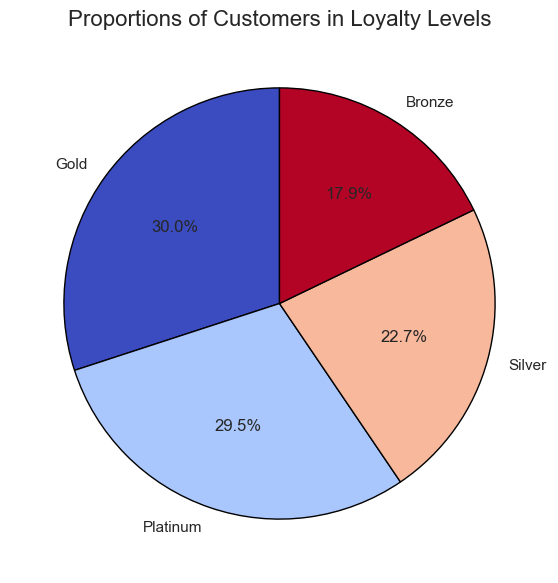

In [86]:
# Calculate the proportions of each loyalty level
loyalty_counts = RFMAproach['LoyaltyLevel'].value_counts()

# Create a pie chart to visualize the proportions of loyalty levels
plt.figure(figsize=(7, 7))
loyalty_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', wedgeprops={'edgecolor': 'black'})
plt.title('Proportions of Customers in Loyalty Levels', fontsize=16)
plt.ylabel('')
plt.show()

- **Platinum** and **Gold** customers account for **59.48%** of the total customer base and contribute significantly to revenue. It's critical to retain and engage these segments.

- **Silver** and **Bronze** customers account for **40.51%**. These groups should be targeted with re-engagement strategies to improve their loyalty and increase their spending.

### Distribution of Customer Loyalty Levels
distribution of customers across the different loyalty levels.

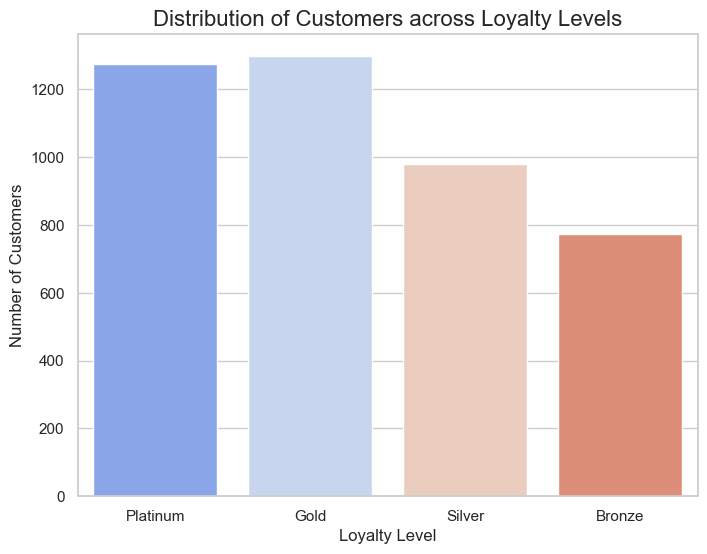

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot for a clean and modern look
sns.set(style="whitegrid")

# Create a bar plot to visualize the distribution of loyalty levels
plt.figure(figsize=(8,6))
sns.countplot(data=RFMAproach, x='LoyaltyLevel', palette='coolwarm')
plt.title('Distribution of Customers across Loyalty Levels', fontsize=16)
plt.xlabel('Loyalty Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

### Loyalty Levels with Monetary Value
how much revenue each loyalty segment generates.

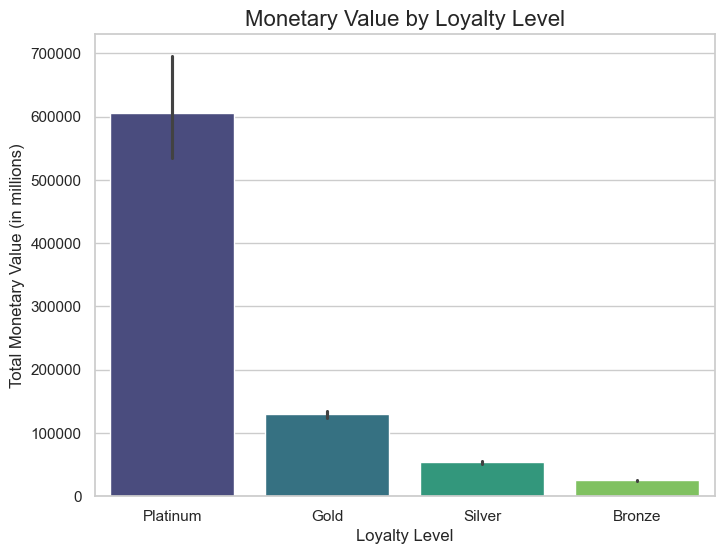

In [91]:
# Create a bar plot to visualize the total monetary value per loyalty level
plt.figure(figsize=(8,6))
sns.barplot(data=RFMAproach, x='LoyaltyLevel', y='Monetory', palette='viridis')
plt.title('Monetary Value by Loyalty Level', fontsize=16)
plt.xlabel('Loyalty Level', fontsize=12)
plt.ylabel('Total Monetary Value (in millions)', fontsize=12)
plt.show()

### Customer Segments by Loyalty Level and Recency
how recent customers are in each loyalty level.

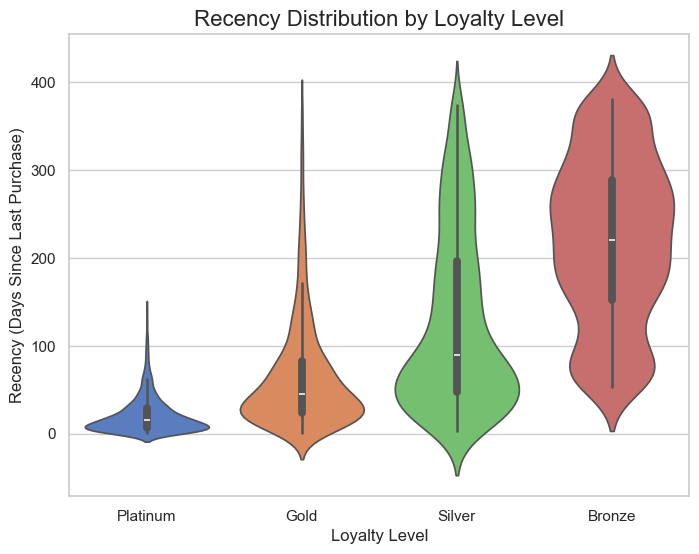

In [93]:
# Create a violin plot to show the distribution of recency for each loyalty level
plt.figure(figsize=(8,6))
sns.violinplot(data=RFMAproach, x='LoyaltyLevel', y='Recency', palette='muted')
plt.title('Recency Distribution by Loyalty Level', fontsize=16)
plt.xlabel('Loyalty Level', fontsize=12)
plt.ylabel('Recency (Days Since Last Purchase)', fontsize=12)
plt.show()

### Percentage of Total Revenue by Loyalty Level
This bar plot will show how much total revenue comes from each loyalty segment.

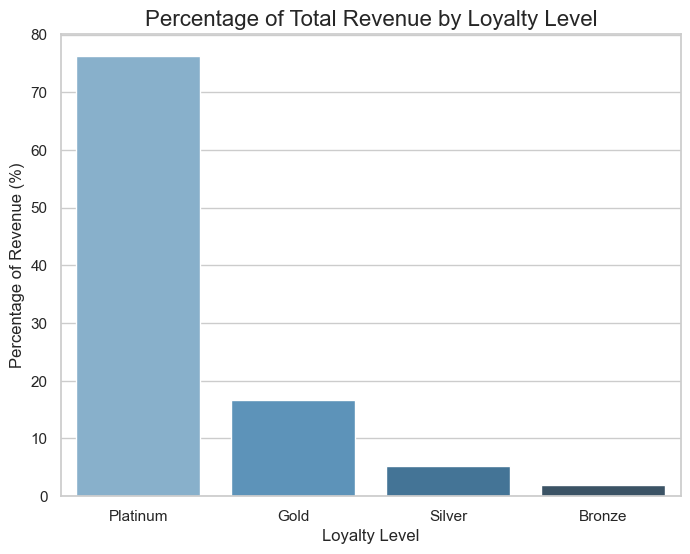

In [95]:
# Calculate the percentage of total revenue for each loyalty level
total_revenue = RFMAproach.groupby('LoyaltyLevel')['Monetory'].sum()
percent_revenue = (total_revenue / total_revenue.sum()) * 100

# Create a bar plot to visualize the percentage of revenue per loyalty level
plt.figure(figsize=(8,6))
sns.barplot(x=percent_revenue.index, y=percent_revenue, palette='Blues_d')
plt.title('Percentage of Total Revenue by Loyalty Level', fontsize=16)
plt.xlabel('Loyalty Level', fontsize=12)
plt.ylabel('Percentage of Revenue (%)', fontsize=12)
plt.show()


## Conclusion:

The segmentation of customers into **Platinum**, **Gold**, **Silver**, and **Bronze** based on **Recency, Frequency, and Monetary (RFM)** scores provides clear insights:

1. **Platinum and Gold customers** are the most valuable, contributing significantly to revenue. Prioritizing retention and rewards for these high-value customers is crucial.

2. **Silver customers** have potential for growth, and targeted efforts to increase their frequency and spending can elevate them to higher tiers.

3. **Bronze customers** contribute the least but can be nurtured through strategies to increase engagement and move them to higher loyalty levels.

4. **Tailored Marketing**: Applying different marketing strategies for each segment helps maximize **customer lifetime value**, improve **retention**, and boost **overall revenue**.

In summary, **RFM segmentation** allows businesses to **prioritize efforts**, **allocate resources efficiently**, and **optimize marketing strategies** for higher **profitability** and more effective customer engagement.